# PERSUADE 2.0 Dataset Notebook
## 4. Data Analysis

Tests related to the PERSUADE 2.0 essay dataset.

### Load dataset

#### 1. PERSUADE 2.0 Dataset

In [13]:
import pandas as pd

df = pd.read_csv("persuade/cleaned_persuade.csv")
print("Shape:", df.shape)
df.head()

Shape: (25078, 5)


,essay_id_comp,full_text,holistic_essay_score,word_count,prompt_name
0,423A1CA112E2,phones\n\nmodern humans today are always on th...,3,378,Phones and driving
1,BC75783F96E3,this essay will explain if drivers should or s...,4,432,Phones and driving
2,74C8BC7417DE,driving while the use of cellular devices\n\nt...,2,179,Phones and driving
3,A8445CABFECE,phones & driving\n\ndrivers should not be able...,3,221,Phones and driving
4,6B4F7A0165B9,cell phone operation while driving\n\nthe abil...,4,334,Phones and driving


In [14]:
print("Column names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Column names: ['essay_id_comp', 'full_text', 'holistic_essay_score', 'word_count', 'prompt_name']

Data types:
 essay_id_comp           object
full_text               object
holistic_essay_score     int64
word_count               int64
prompt_name             object
dtype: object

Missing values:
 essay_id_comp           0
full_text               0
holistic_essay_score    0
word_count              0
prompt_name             0
dtype: int64


In [15]:
df[["holistic_essay_score", "word_count"]].describe()

,holistic_essay_score,word_count
count,25078.000000,25078.000000
mean,3.252253,392.711181
std,1.112420,159.370118
min,1.000000,146.000000
25%,2.000000,265.000000
50%,3.000000,367.000000
75%,4.000000,492.000000
max,6.000000,850.000000


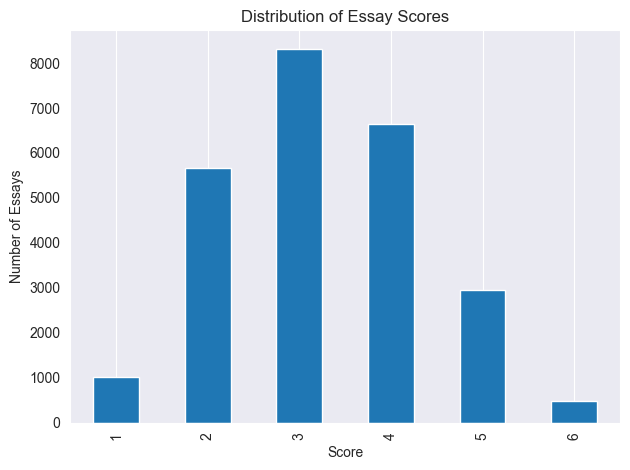

In [16]:
import matplotlib.pyplot as plt

df["holistic_essay_score"].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Essay Scores")
plt.xlabel("Score")
plt.ylabel("Number of Essays")
plt.grid(axis="y")
plt.tight_layout()

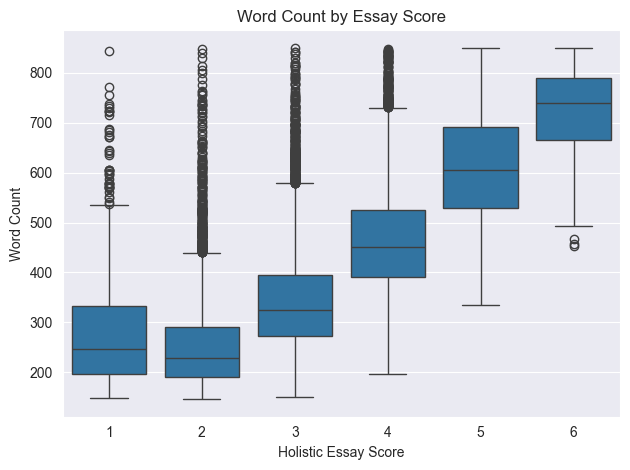

In [17]:
import seaborn as sns

sns.boxplot(data=df, x="holistic_essay_score", y="word_count")
plt.title("Word Count by Essay Score")
plt.xlabel("Holistic Essay Score")
plt.ylabel("Word Count")
plt.tight_layout()

#### Tagged Dataset

In [18]:
stance_labels = {0: "PRO", 1: "CON", 2: "NEUTRAL"}
sentiment_labels = {0: "POSITIVE", 1: "NEGATIVE"}
formality_labels = {0: "FORMAL", 1: "INFORMAL"}

# load tagged dataset
df_tagged = pd.read_csv("persuade/tagged_persuade.csv")
print("Tagged shape:", df_tagged.shape)
df_tagged.head()

Tagged shape: (25078, 8)


,essay_id_comp,full_text,holistic_essay_score,word_count,prompt_name,stance,formality,sentiment
0,423A1CA112E2,phones\n\nmodern humans today are always on th...,3,378,Phones and driving,2.0,0,0.0
1,BC75783F96E3,this essay will explain if drivers should or s...,4,432,Phones and driving,1.0,0,0.0
2,74C8BC7417DE,driving while the use of cellular devices\n\nt...,2,179,Phones and driving,1.0,0,1.0
3,A8445CABFECE,phones & driving\n\ndrivers should not be able...,3,221,Phones and driving,1.0,1,1.0
4,6B4F7A0165B9,cell phone operation while driving\n\nthe abil...,4,334,Phones and driving,1.0,0,1.0


In [19]:
# count nulls (classification errors)
null_counts = df_tagged[["stance", "sentiment", "formality"]].isnull().sum()
total_rows = len(df)
null_percentages = (null_counts / total_rows * 100).round(2)
null_report = pd.DataFrame({
    "null count": null_counts,
    "percent (%)": null_percentages
})

null_report

,null count,percent (%)
stance,265,1.06
sentiment,342,1.36
formality,0,0.00


In [20]:
# drop null values
stance_df = df_tagged[df_tagged["stance"].notnull()]
sentiment_df = df_tagged[df_tagged["sentiment"].notnull()]
formality_df = df_tagged[df_tagged["formality"].notnull()]

In [21]:
stance_df["stance"].map(stance_labels).value_counts().reindex(["PRO", "CON", "NEUTRAL"])

stance
PRO        16071
CON         7518
NEUTRAL     1224
Name: count, dtype: int64

In [22]:
sentiment_df["sentiment"].map(sentiment_labels).value_counts().reindex(["POSITIVE", "NEGATIVE"])

sentiment
POSITIVE    17903
NEGATIVE     6833
Name: count, dtype: int64

In [23]:
formality_df["formality"].map(formality_labels).value_counts().reindex(["FORMAL", "INFORMAL"])

formality
FORMAL      20245
INFORMAL     4833
Name: count, dtype: int64

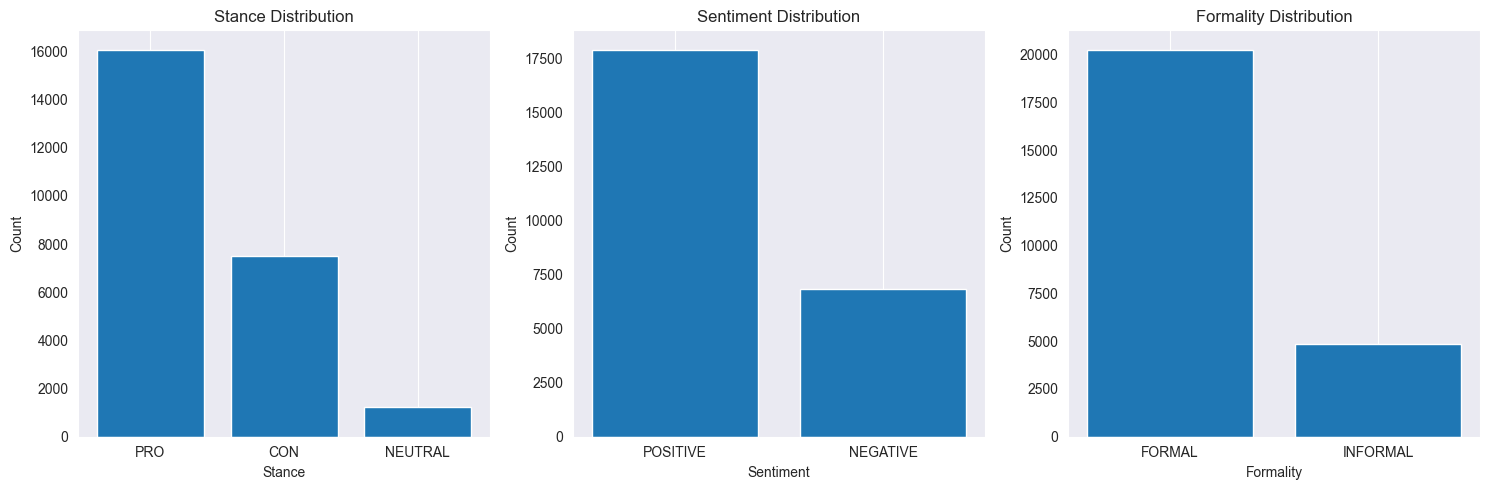

In [24]:
# fig and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# stance
stance_counts = stance_df["stance"].value_counts().sort_index()
axes[0].bar(stance_counts.index, stance_counts.values)
axes[0].set_title("Stance Distribution")
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(["PRO", "CON", "NEUTRAL"])
axes[0].set_xlabel("Stance")
axes[0].set_ylabel("Count")
axes[0].grid(axis="y")

# sentiment
sentiment_counts = sentiment_df["sentiment"].value_counts().sort_index()
axes[1].bar(sentiment_counts.index, sentiment_counts.values)
axes[1].set_title("Sentiment Distribution")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["POSITIVE", "NEGATIVE"])
axes[1].set_xlabel("Sentiment")
axes[1].set_ylabel("Count")
axes[1].grid(axis="y")

# formality
formality_counts = formality_df["formality"].value_counts().sort_index()
axes[2].bar(formality_counts.index, formality_counts.values)
axes[2].set_title("Formality Distribution")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(["FORMAL", "INFORMAL"])
axes[2].set_xlabel("Formality")
axes[2].set_ylabel("Count")
axes[2].grid(axis="y")

plt.tight_layout()

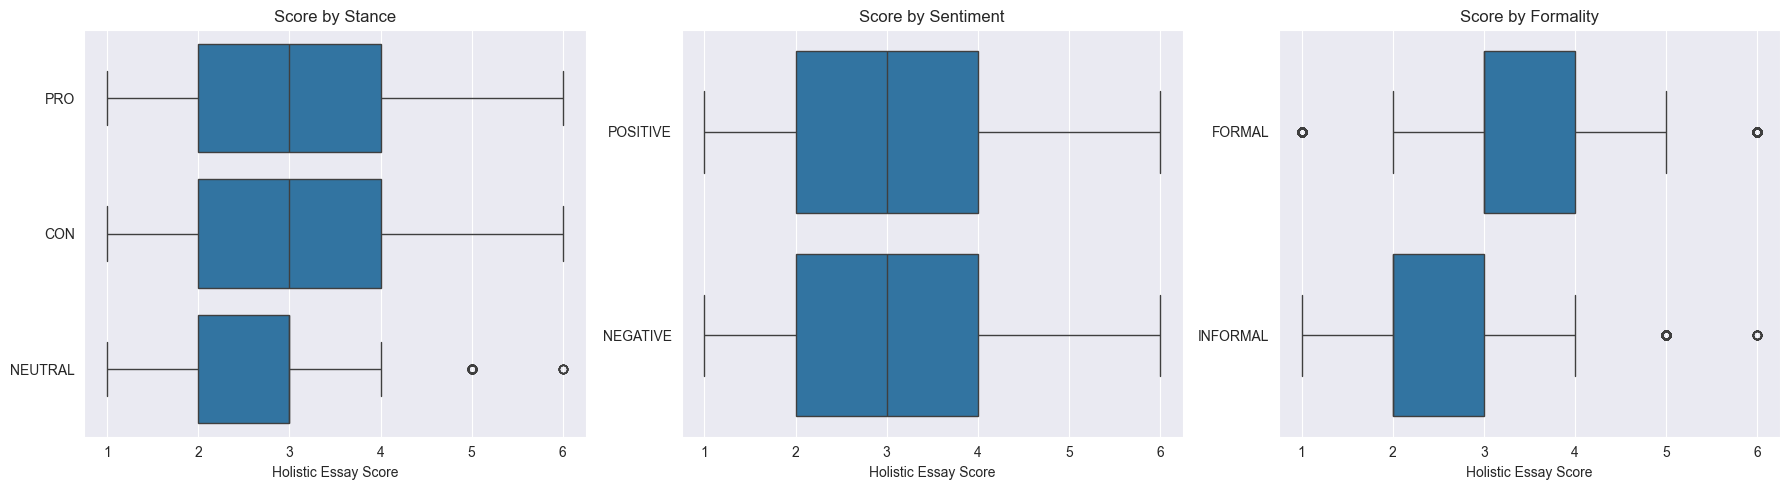

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=False)

# stance
sns.boxplot(
    y='stance',
    x='holistic_essay_score',
    data=df_tagged,
    ax=axes[0],
    orient='h',
)
axes[0].set_yticks([0, 1, 2])
axes[0].set_yticklabels(['PRO', 'CON', 'NEUTRAL'])
axes[0].set_title("Score by Stance")
axes[0].set_xlabel("Holistic Essay Score")
axes[0].set_ylabel("")

# sentiment
sns.boxplot(
    y='sentiment',
    x='holistic_essay_score',
    data=df_tagged,
    ax=axes[1],
    orient='h',
)
axes[1].set_yticks([0, 1])
axes[1].set_yticklabels(['POSITIVE', 'NEGATIVE'])
axes[1].set_title("Score by Sentiment")
axes[1].set_xlabel("Holistic Essay Score")
axes[1].set_ylabel("")

# formality
sns.boxplot(
    y='formality',
    x='holistic_essay_score',
    data=df_tagged,
    ax=axes[2],
    orient='h',
)
axes[2].set_yticks([0, 1])
axes[2].set_yticklabels(['FORMAL', 'INFORMAL'])
axes[2].set_title("Score by Formality")
axes[2].set_xlabel("Holistic Essay Score")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

In [91]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

# prepare data
df = df_tagged.dropna(subset=["stance", "sentiment", "formality", "holistic_essay_score"])
df.loc[:, "stance"] = df["stance"].astype(int)
df.loc[:, "sentiment"] = df["sentiment"].astype(int)
df.loc[:, "formality"] = df["formality"].astype(int)
df.loc[:, "holistic_essay_score"] = df["holistic_essay_score"].astype(int)

# fit regression model
model = OrderedModel(
    df["holistic_essay_score"],
    pd.get_dummies(df[["stance", "sentiment", "formality"]], drop_first=True),
    distr="logit"
)
res = model.fit(method='bfgs')
res.summary()

Optimization terminated successfully.
         Current function value: 1.459950
         Iterations: 27
         Function evaluations: 29
         Gradient evaluations: 29


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OrderedModel Results                              
================================================================================
Dep. Variable:     holistic_essay_score   Log-Likelihood:                -35735.
Model:                     OrderedModel   AIC:                         7.149e+04
Method:              Maximum Likelihood   BIC:                         7.155e+04
Date:                  Thu, 17 Jul 2025                                         
Time:                          18:27:38                                         
No. Observations:                 24477                                         
Df Residuals:                     24469                                         
Df Model:                             3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
stance        -0.2417      0.022    -10.842      0.000      -0.285      -0.198
sentiment      0.2188      0.029      7.611      0.000       0.162       0.275
formality     -1.5191      0.031    -48.701      0.000      -1.580      -1.458
1/2           -3.7093      0.036   -101.943      0.000      -3.781      -3.638
2/3            0.8302      0.014     59.432      0.000       0.803       0.858
3/4            0.4248      0.010     42.470      0.000       0.405       0.444
4/5            0.4028      0.011     35.161      0.000       0.380       0.425
5/6            0.7412      0.021     36.088      0.000       0.701       0.782
==============================================================================
"""

In [98]:
import itertools
import pandas as pd
from scipy.special import expit

# regression coefficients
beta = {
    'stance':   -0.2417,
    'sentiment': 0.2188,
    'formality':-1.5191
}

# five taus from fitted model
tau = [
    -3.7093,  # tau1 (1/2)
     0.8302,  # tau2 (2/3)
     0.4248,  # tau3 (3/4)
     0.4028,  # tau4 (4/5)
     0.7412   # tau5 (5/6)
]

rows = []
for sentiment, formality, stance in itertools.product([0,1], [0,1], [0,1,2]):
    # get linear predictor
    eta = (sentiment*beta['sentiment'] + formality*beta['formality'] + stance*beta['stance'])
    # cumulative probs
    cdf = [expit(t - eta) for t in tau]
    cdf = [0.0] + cdf + [1.0]  # pad

    # category probs
    probs = [cdf[j] - cdf[j-1] for j in range(1,7)]

    # expected score
    exp_score = sum(j * p for j,p in enumerate(probs, start=1))

    rows.append({
        'sentiment': 'NEGATIVE' if sentiment else 'POSITIVE',
        'formality': 'INFORMAL' if formality else 'FORMAL',
        'stance':    ['PRO','CON','NEUTRAL'][stance],
        'linear_score_advantage': eta,
        'expected_score':  exp_score
    })

df = pd.DataFrame(rows)
df

,sentiment,formality,stance,linear_score_advantage,expected_score
0,POSITIVE,FORMAL,PRO,0.0000,3.398444
1,POSITIVE,FORMAL,CON,-0.2417,3.180621
2,POSITIVE,FORMAL,NEUTRAL,-0.4834,2.980073
3,POSITIVE,INFORMAL,PRO,-1.5191,2.333822
4,POSITIVE,INFORMAL,CON,-1.7608,2.224839
5,POSITIVE,INFORMAL,NEUTRAL,-2.0025,2.126331
6,NEGATIVE,FORMAL,PRO,0.2188,3.607541
7,NEGATIVE,FORMAL,CON,-0.0229,3.377152
8,NEGATIVE,FORMAL,NEUTRAL,-0.2646,3.160837
9,NEGATIVE,INFORMAL,PRO,-1.3003,2.443869


#### Scored Dataset

In [64]:
import os
import pandas as pd

# strings for file loading
base_folder = "counterfactuals_scored/persuade"
models = ["gemma3", "llama3", "qwen3", "deepseek"]
filenames = [
    "formality_formal_to_informal_scored.csv",
    "formality_informal_to_formal_scored.csv",
    "sentiment_negative_to_positive_scored.csv",
    "sentiment_positive_to_negative_scored.csv",
    "stance_con_to_pro_scored.csv",
    "stance_pro_to_con_scored.csv"
]

all_data = []
for model in models:
    for fname in filenames:
        fpath = os.path.join(base_folder, model, fname)
        if os.path.exists(fpath):
            df = pd.read_csv(fpath)
            df['model'] = model
            df['direction'] = fname.replace("_scored.csv", "")
            all_data.append(df)
        else:
            print(f"Missing file: {fpath}")

# combine all into a single dataframe
df_all = pd.concat(all_data, ignore_index=True)

# separate essay_code into two attributes
df_all['version'] = df_all['essay_code'].apply(lambda x: 'OR' if x.endswith('-O') else 'CF')
df_all['essay_id'] = df_all['essay_code'].str.extract(r'(\d+)-')[0].astype(int)

# sort and show
df_all.sort_values(by=['model', 'direction', 'essay_id', 'version'], inplace=True)
df_all = df_all.dropna(subset=["score_llm"]).reset_index(drop=True)
df_all

,essay_code,full_text,attribute,label,score_og,score_llm,model,direction,version,essay_id
0,354-CFO,"cell phone use while driving is, like, a reall...",formality,1,4,6.0,deepseek,formality_formal_to_informal,CF,354
1,354-O,cell phone use while driving is one of those h...,formality,0,4,6.0,deepseek,formality_formal_to_informal,OR,354
2,440-CFO,phones and driving\n\neveryday people die in c...,formality,1,3,6.0,deepseek,formality_formal_to_informal,CF,440
3,440-O,phones and driving\n\neveryday people die in c...,formality,0,3,6.0,deepseek,formality_formal_to_informal,OR,440
4,467-CFO,cell phones? pretty much everyone’s got one th...,formality,1,4,6.0,deepseek,formality_formal_to_informal,CF,467
...,...,...,...,...,...,...,...,...,...,...
4772,24015-O,is it better fro you to ask for more advice or...,stance,0,3,5.0,qwen3,stance_pro_to_con,OR,24015
4773,24395-CST,"in 2002, a study showed that only 23% of ameri...",stance,1,5,5.0,qwen3,stance_pro_to_con,CF,24395
4774,24395-O,"in 2002, a study showed that only 23% of ameri...",stance,0,5,5.0,qwen3,stance_pro_to_con,OR,24395
4775,24743-CST,"have you ever been stuck, not knowing what cho...",stance,1,6,5.0,qwen3,stance_pro_to_con,CF,24743


In [65]:
# Count the number of originals and counterfactuals per model
cf_counts = df_all.groupby(['model', 'version']).size().unstack(fill_value=0)
cf_counts

version,CF,OR
model,,
deepseek,588,589
gemma3,600,600
llama3,600,600
qwen3,600,600


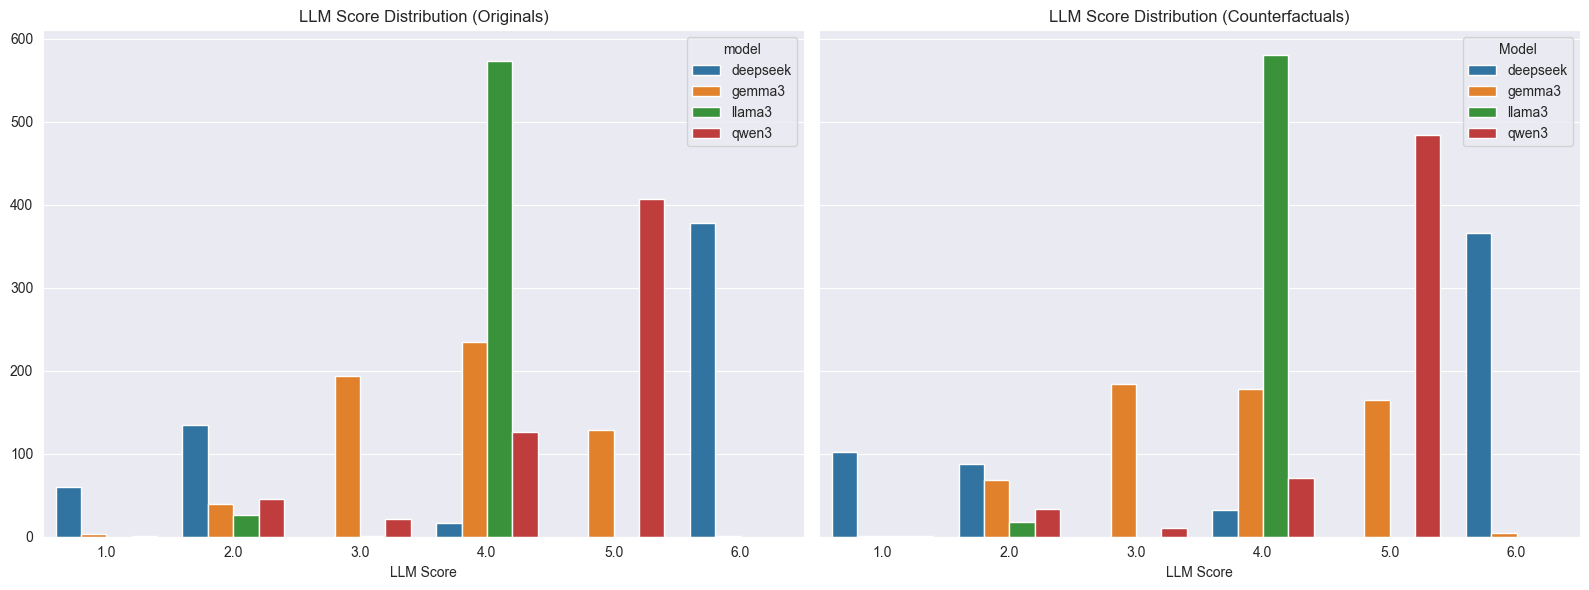

In [66]:
# cast score_llm to number
df_all["score_llm"] = pd.to_numeric(df_all["score_llm"], errors='coerce')

# get cfs and originals
df_orig = df_all[df_all["essay_code"].str.contains("-O")]
df_cf = df_all[df_all["essay_code"].str.contains("-C")]

# handle order and colors
score_order = sorted(df_all["score_llm"].dropna().unique())
model_list = sorted(df_all["model"].dropna().unique())  # Ensures consistent model ordering
model_palette = sns.color_palette("tab10", len(model_list))
model_colors = dict(zip(model_list, model_palette))

# subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# original plot
sns.countplot(
    data=df_orig, x="score_llm", hue="model",
    order=score_order, hue_order=model_list,
    ax=axes[0], palette=model_colors
)
axes[0].set_title("LLM Score Distribution (Originals)")
axes[0].set_xlabel("LLM Score")
axes[0].set_ylabel("")

# cf plot
sns.countplot(
    data=df_cf, x="score_llm", hue="model",
    order=score_order, hue_order=model_list,
    ax=axes[1], palette=model_colors
)
axes[1].set_title("LLM Score Distribution (Counterfactuals)")
axes[1].set_xlabel("LLM Score")
axes[1].set_ylabel("Count")
axes[1].legend(title="Model")

plt.tight_layout()

Text(0.5, 0.98, 'Original vs Counterfactual LLM Score Distribution by direction and model')

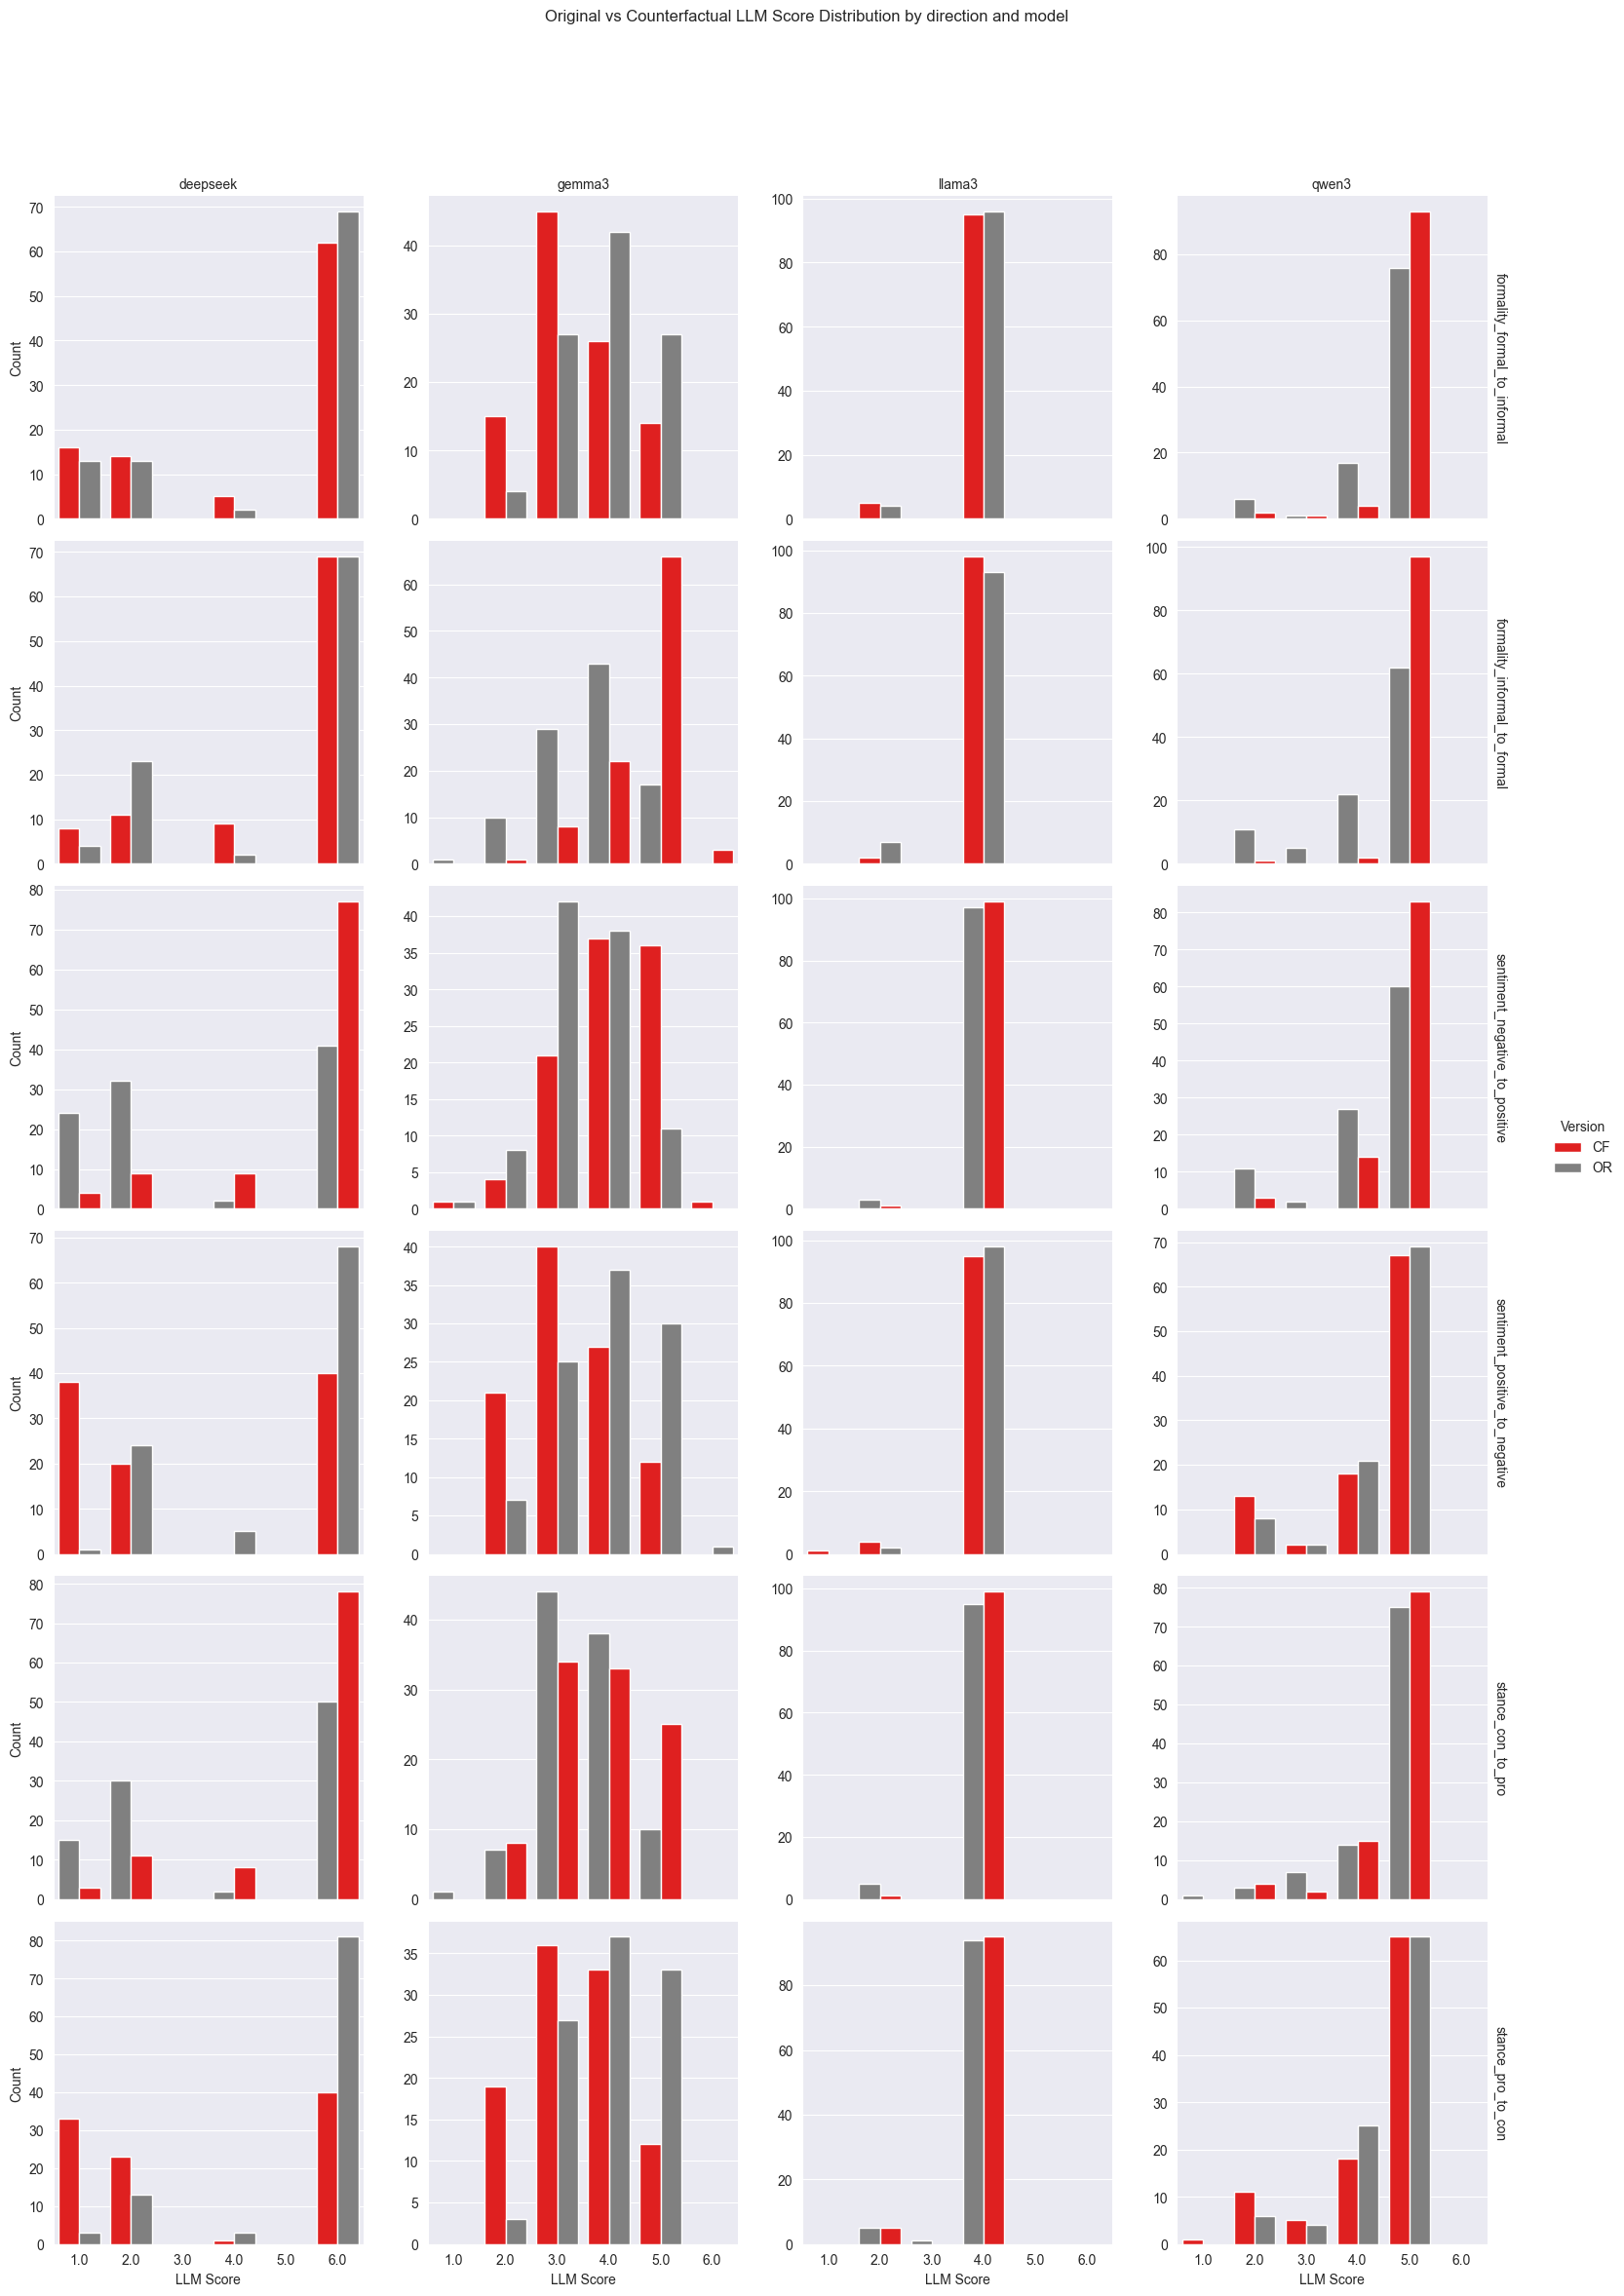

In [67]:
# filter df
df_subset = df_all[df_all['version'].isin(['OR', 'CF'])].copy()

# handle order
score_order = sorted(df_subset['score_llm'].unique())

# plots
g = sns.FacetGrid(
    df_subset,
    row="direction",
    col="model",
    height=4,
    margin_titles=True,
    sharey=False
)
g.map_dataframe(
    sns.countplot,
    x="score_llm",
    hue="version",
    palette={"OR": "gray", "CF": "red"},
    order=score_order
)

# plot details
g.set_axis_labels("LLM Score", "Count")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.add_legend(title="Version")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Original vs Counterfactual LLM Score Distribution by direction and model")

In [68]:
# get metrics
summary_metrics = (
    df_all[df_all["version"].isin(["OR", "CF"])]
    .groupby(["model", "direction", "version"])["score_llm"]
    .agg(["count", "mean", "std", "median", "min", "max"])
    .reset_index()
    .sort_values(by=["model", "direction", "version"])
)

summary_metrics

,model,direction,version,count,mean,std,median,min,max
0,deepseek,formality_formal_to_informal,CF,97,4.494845,2.102200,6.0,1.0,6.0
1,deepseek,formality_formal_to_informal,OR,97,4.752577,2.015724,6.0,1.0,6.0
2,deepseek,formality_informal_to_formal,CF,97,4.948454,1.781684,6.0,1.0,6.0
3,deepseek,formality_informal_to_formal,OR,98,4.816327,1.868606,6.0,1.0,6.0
4,deepseek,sentiment_negative_to_positive,CF,99,5.252525,1.514174,6.0,1.0,6.0
5,deepseek,sentiment_negative_to_positive,OR,99,3.454545,2.209778,2.0,1.0,6.0
6,deepseek,sentiment_positive_to_negative,CF,98,3.244898,2.328936,2.0,1.0,6.0
7,deepseek,sentiment_positive_to_negative,OR,98,4.867347,1.768206,6.0,1.0,6.0
8,deepseek,stance_con_to_pro,CF,100,5.250000,1.513408,6.0,1.0,6.0
9,deepseek,stance_con_to_pro,OR,97,3.948454,2.176442,6.0,1.0,6.0


In [69]:
mean_diff_df = (
    df_all[df_all["version"].isin(["OR", "CF"])]
    .groupby(["model", "direction", "version"])["score_llm"]
    .mean()
    .unstack("version")
    .reset_index()
)

# difference: CF - OR (positive = score went up after cf)
mean_diff_df["diff"] = mean_diff_df["CF"] - mean_diff_df["OR"]
mean_diff_df["change"] = mean_diff_df["diff"].apply(
    lambda x: "increase" if x > 0 else "decrease" if x < 0 else "no change"
)

mean_diff_df

version,model,direction,CF,OR,diff,change
0,deepseek,formality_formal_to_informal,4.494845,4.752577,-0.257732,decrease
1,deepseek,formality_informal_to_formal,4.948454,4.816327,0.132127,increase
2,deepseek,sentiment_negative_to_positive,5.252525,3.454545,1.797980,increase
3,deepseek,sentiment_positive_to_negative,3.244898,4.867347,-1.622449,decrease
4,deepseek,stance_con_to_pro,5.250000,3.948454,1.301546,increase
5,deepseek,stance_pro_to_con,3.329897,5.270000,-1.940103,decrease
6,gemma3,formality_formal_to_informal,3.390000,3.920000,-0.530000,decrease
7,gemma3,formality_informal_to_formal,4.620000,3.650000,0.970000,increase
8,gemma3,sentiment_negative_to_positive,4.060000,3.500000,0.560000,increase
9,gemma3,sentiment_positive_to_negative,3.300000,3.930000,-0.630000,decrease


In [70]:
avg_diff = (
    mean_diff_df
    .groupby("direction")["diff"]
    .mean()
    .reset_index()
    .rename(columns={"diff":"avg_diff_all_models"})
)

change_counts = (
    mean_diff_df
    .groupby(["direction","change"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

direction_summary = avg_diff.merge(change_counts, on="direction")

direction_summary

,direction,avg_diff_all_models,decrease,increase
0,formality_formal_to_informal,-0.139433,3,1
1,formality_informal_to_formal,0.450532,0,4
2,sentiment_negative_to_positive,0.701995,0,4
3,sentiment_positive_to_negative,-0.610612,4,0
4,stance_con_to_pro,0.435387,0,4
5,stance_pro_to_con,-0.672526,3,1


In [71]:
# load tagged dataset
df = pd.read_csv("persuade/tagged_persuade.csv").dropna(subset=["stance", "sentiment", "formality", "holistic_essay_score"])

# make sure numeric
df["stance"] = df["stance"].astype(int)
df["sentiment"] = df["sentiment"].astype(int)
df["formality"] = df["formality"].astype(int)

# mean by group
human_means = {
    "stance": df.groupby("stance") ["holistic_essay_score"].mean(),
    "sentiment": df.groupby("sentiment") ["holistic_essay_score"].mean(),
    "formality": df.groupby("formality") ["holistic_essay_score"].mean(),
}

# get human gaps
human_gaps = {
    "stance_PRO_vs_CON": human_means["stance"][0] - human_means["stance"][1],
    "sent_POS_vs_NEG": human_means["sentiment"][0] - human_means["sentiment"][1],
    "formal_vs_informal": human_means["formality"][0] - human_means["formality"][1],
}

for k,v in human_gaps.items():
    print(f"{k:24s} {v:+0.2f}")

stance_PRO_vs_CON        +0.02
sent_POS_vs_NEG          -0.01
formal_vs_informal       +0.87


### Metrics

In [79]:
import glob
import os
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# computes qwk from df depending on mode (original or counterfactuals, or any/both)
def compute_qwk(df, mode):
    # clean dfs from nulls
    df = df.dropna(subset=["score_og", "score_llm"])
    if mode == "OR":
        sel = df[df["essay_code"].str.endswith("-O")]
    elif mode == "CF":
        sel = df[df["essay_code"].str.contains("-C")]
    else:
        sel = df
    return cohen_kappa_score(sel["score_og"], sel["score_llm"], weights="quadratic")


# load data in dfs
BASE = "counterfactuals_scored/persuade"

models = {}
for model_name in os.listdir(BASE):
    model_dir = os.path.join(BASE, model_name)
    if not os.path.isdir(model_dir):
        continue

    # find all csv files for each scored model
    paths = glob.glob(os.path.join(model_dir, "*_scored.csv"))
    if not paths:
        # skip folders that don't have csv files
        print(f"no files for {model_name}, skipping")
        continue

    # load and add to df
    dfs = [pd.read_csv(p) for p in paths]
    df_all = pd.concat(dfs, ignore_index=True)
    models[model_name] = df_all

# get per‐model QWK
for name, df in models.items():
    q_or = compute_qwk(df, "OR")
    q_cf = compute_qwk(df, "CF")
    q_both = compute_qwk(df, "both")
    print(f"\n=== QWK for {name} ===")
    print(f" originals: {q_or:.4f}")
    print(f" counterfactuals: {q_cf:.4f}")
    print(f" diff: {q_or - q_cf:.4f}")
    print(f" combined: {q_both:.4f}")


=== QWK for llama3 ===
 originals: 0.0776
 counterfactuals: 0.0429
 diff: 0.0347
 combined: 0.0603

=== QWK for gemma3 ===
 originals: 0.4564
 counterfactuals: 0.3014
 diff: 0.1550
 combined: 0.3751

=== QWK for qwen3 ===
 originals: 0.2179
 counterfactuals: 0.1147
 diff: 0.1032
 combined: 0.1641

=== QWK for deepseek ===
 originals: 0.1540
 counterfactuals: 0.1268
 diff: 0.0271
 combined: 0.1403


In [106]:
def compute_osd_csd(df_subset):
    # drop any rows missing either score
    df = df_subset.dropna(subset=['score_og','score_llm','label']).copy()
    df.loc[:, 'label'] = df['label'].astype(int)

    # osd: absolute value between system and human score
    df['error'] = df['score_llm'] - df['score_og']
    # gap in mean error between groups
    m1 = df.loc[df['label']==1, 'error'].mean()
    m0 = df.loc[df['label']==0, 'error'].mean()
    osd = m1 - m0

    # csd: average over each true score of (mean1 − mean0)
    cds = []
    for true_score in sorted(df['score_og'].unique()):
        sub = df[df['score_og'] == true_score]
        # require at least one example of each label
        if set(sub['label']) >= {0, 1}:
            m1 = sub.loc[sub['label'] == 1, 'score_llm'].mean()
            m0 = sub.loc[sub['label'] == 0, 'score_llm'].mean()
            cds.append(m1 - m0)
    csd = np.mean(cds) if cds else np.nan

    return osd, csd

BASE = "counterfactuals_scored/persuade"
rows = []
for model_name in os.listdir(BASE):
    model_dir = os.path.join(BASE, model_name)
    if not os.path.isdir(model_dir):
        continue
    for path in glob.glob(os.path.join(model_dir, "*_scored.csv")):
        df = pd.read_csv(path)
        osd, csd = compute_osd_csd(df)
        flip = os.path.basename(path).replace("_scored.csv","")
        # get flip
        attribute = flip.split("_")[0]
        rows.append({
            "model":     model_name,
            "attribute": attribute,
            "flip":      flip,
            "OSD":       osd,
            "CSD":       csd
        })

df = pd.DataFrame(rows)

# attr order
attr_order = ["formality","sentiment","stance"]
df["attribute"] = pd.Categorical(df["attribute"], categories=attr_order, ordered=True)

# final sort
df = df.sort_values(["model","attribute","flip"]).reset_index(drop=True)
df

,model,attribute,flip,OSD,CSD
0,deepseek,formality,formality_formal_to_informal,-0.237113,-0.554282
1,deepseek,formality,formality_informal_to_formal,-0.150957,-0.022801
2,deepseek,sentiment,sentiment_negative_to_positive,-1.828283,-1.736527
3,deepseek,sentiment,sentiment_positive_to_negative,-1.612245,-2.198890
4,deepseek,stance,stance_con_to_pro,-1.288351,-1.376054
5,deepseek,stance,stance_pro_to_con,-1.947216,-1.572273
6,gemma3,formality,formality_formal_to_informal,-0.530000,-0.488484
7,gemma3,formality,formality_informal_to_formal,-0.970000,-0.733420
8,gemma3,sentiment,sentiment_negative_to_positive,-0.560000,-0.574573
9,gemma3,sentiment,sentiment_positive_to_negative,-0.630000,-0.464304


In [107]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def compute_osd_csd_regression(df):
    """
    Given a DataFrame with columns
      - score_og : human score H
      - score_llm: automated score S
      - label    : 0 or 1 (the student‐group indicator)
    returns
      - osd_r2 : R² from regressing |S−H| ~ label
      - csd_delta_r2 :
            (R² from |S−H| ~ H + label) minus (R² from |S−H| ~ H)
    """

    # 1) drop nulls & cast
    df = df.dropna(subset=['score_og','score_llm','label']).copy()
    df['label'] = df['label'].astype(int)

    # 2) compute absolute error
    df['abs_error'] = np.abs(df['score_llm'] - df['score_og'])

    X_label = df[['label']].values
    X_H     = df[['score_og']].values
    X_both  = df[['score_og','label']].values
    y       = df['abs_error'].values

    # 3) Fit OSD model: abs_error ~ label
    lm_osd = LinearRegression().fit(X_label, y)
    y_pred_osd = lm_osd.predict(X_label)
    osd_r2 = r2_score(y, y_pred_osd)

    # 4) Fit two models for CSD:
    #    (a) abs_error ~ H
    lm_csd_1 = LinearRegression().fit(X_H, y)
    y1       = lm_csd_1.predict(X_H)
    r2_1     = r2_score(y, y1)

    #    (b) abs_error ~ H + label
    lm_csd_2 = LinearRegression().fit(X_both, y)
    y2       = lm_csd_2.predict(X_both)
    r2_2     = r2_score(y, y2)

    csd_delta_r2 = r2_2 - r2_1

    return osd_r2, csd_delta_r2

In [110]:
import glob, os

BASE = "counterfactuals_scored/persuade"
results = []

for model_name in os.listdir(BASE):
    model_dir = os.path.join(BASE, model_name)
    if not os.path.isdir(model_dir):
        continue

    for csv_path in glob.glob(os.path.join(model_dir, "*.csv")):
        df = pd.read_csv(csv_path)
        osd_r2, csd_delta_r2 = compute_osd_csd_regression(df)

        results.append({
            "model": model_name,
            "flip_file": os.path.basename(csv_path),
            "OSD_R2": osd_r2,
            "CSD_delta_R2": csd_delta_r2
        })

df_results = pd.DataFrame(results)
df_results

,model,flip_file,OSD_R2,CSD_delta_R2
0,llama3,sentiment_positive_to_negative_scored.csv,0.000036,0.000036
1,llama3,stance_con_to_pro_scored.csv,0.001408,0.001408
2,llama3,formality_formal_to_informal_scored.csv,0.000606,0.000606
3,llama3,sentiment_negative_to_positive_scored.csv,0.000606,0.000606
4,llama3,stance_pro_to_con_scored.csv,0.000350,0.000350
5,llama3,formality_informal_to_formal_scored.csv,0.000142,0.000142
6,gemma3,sentiment_positive_to_negative_scored.csv,0.000351,0.000351
7,gemma3,stance_con_to_pro_scored.csv,0.041544,0.041544
8,gemma3,formality_formal_to_informal_scored.csv,0.005881,0.005881
9,gemma3,sentiment_negative_to_positive_scored.csv,0.043954,0.043954


### JS Distance

In [51]:
import glob
import os
import pandas as pd
from scipy.spatial.distance import jensenshannon

def compute_js(df, score_col='score_llm', code_col='essay_code'):
    df = df.dropna(subset=[score_col]).copy()
    # create version column depending on whether it has -O or -CFO (else)
    df['version'] = np.where(
        df[code_col].str.endswith('-O'),
        'OR',
        'CF'
    )

    # count vectors
    bins = sorted(df[score_col].unique())
    og_counts = df[df['version']=='OR'][score_col].value_counts().reindex(bins, fill_value=0)
    cf_counts = df[df['version']=='CF'][score_col].value_counts().reindex(bins, fill_value=0)

    P = og_counts.values / og_counts.sum()
    Q = cf_counts.values / cf_counts.sum()

    dist = jensenshannon(P, Q, base=2)
    div = dist**2
    return dist, div

BASE = "counterfactuals_scored/persuade"
models = {}
for model_name in os.listdir(BASE):
    model_dir = os.path.join(BASE, model_name)
    if not os.path.isdir(model_dir):
        continue

    paths = glob.glob(os.path.join(model_dir, "*_scored.csv"))
    if not paths:
        print(f"no files for {model_name}, skipping")
        continue

    dfs = [pd.read_csv(p) for p in paths]
    df_all = pd.concat(dfs, ignore_index=True)
    models[model_name] = df_all

for name, df in models.items():
    js_dist, js_div = compute_js(df, score_col='score_llm')

    print(f"\n=== {name} ===")
    print(f"JS distance (OR vs CF):   {js_dist:.4f}")
    print(f"JS divergence (OR vs CF):  {js_div:.4f}")

no files for caes, skipping

=== llama3 ===
JS distance (OR vs CF):   0.0508
JS divergence (OR vs CF):  0.0026

=== gemma3 ===
JS distance (OR vs CF):   0.1195
JS divergence (OR vs CF):  0.0143

=== qwen3 ===
JS distance (OR vs CF):   0.1292
JS divergence (OR vs CF):  0.0167

=== deepseek ===
JS distance (OR vs CF):   0.1277
JS divergence (OR vs CF):  0.0163


### QWK and JS distance per flip per model

In [112]:
import glob, os
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score
from scipy.spatial import distance

BASE = "counterfactuals_scored/persuade"

def extract_direction_from_path(path):
    fname = os.path.basename(path)
    return fname.replace("_scored.csv", "")

def load_model_dfs(base):
    models = {}
    for model in os.listdir(base):
        d = os.path.join(base, model)
        if not os.path.isdir(d): continue
        parts = []
        for csvf in glob.glob(os.path.join(d, "*_scored.csv")):
            df = pd.read_csv(csvf)
            df["direction"] = extract_direction_from_path(csvf)
            parts.append(df)
        if parts:
            models[model] = pd.concat(parts, ignore_index=True)
    return models

def qwk_for_flip(df, flip):
    sub = df[df["direction"] == flip].dropna(subset=["score_og","score_llm"])
    orig = sub[sub["essay_code"].str.endswith("-O")]
    cf   = sub[sub["essay_code"].str.contains("-C")]
    return (
        cohen_kappa_score(orig["score_og"], orig["score_llm"], weights="quadratic"),
        cohen_kappa_score(cf["score_og"],   cf["score_llm"],   weights="quadratic"),
        cohen_kappa_score(sub["score_og"],   sub["score_llm"],   weights="quadratic"),
    )

def js_for_flip(df, flip):
    sub = df[df["direction"] == flip].dropna(subset=["score_llm"])
    # build full support
    support = sorted(sub["score_llm"].astype(int).unique())
    def hist(srs):
        cnt = np.bincount(srs.astype(int), minlength=max(support)+1)[support]
        return cnt / cnt.sum()
    p_or = hist(sub[sub["essay_code"].str.endswith("-O")]["score_llm"])
    p_cf = hist(sub[sub["essay_code"].str.contains("-C")]["score_llm"])
    jsd = distance.jensenshannon(p_or, p_cf)
    return jsd, jsd**2

# load everything
models = load_model_dfs(BASE)

# analyze
for model_name, df in models.items():
    print(f"\n=== Model: {model_name} ===")
    for flip in sorted(df["direction"].unique()):
        q_or, q_cf, q_both = qwk_for_flip(df, flip)
        jsd, js2   = js_for_flip(df, flip)
        print(f"{flip:30s}  QWK(OR)={q_or:.3f}  QWK(CF)={q_cf:.3f}  QWK(both)={q_both:.3f}  Δ={q_or-q_cf:.3f}  "
              f"JSdist={jsd:.3f}  JSdiv={js2:.4f}")


=== Model: llama3 ===
formality_formal_to_informal    QWK(OR)=0.087  QWK(CF)=0.047  QWK(both)=0.067  Δ=0.040  JSdist=0.017  JSdiv=0.0003
formality_informal_to_formal    QWK(OR)=0.065  QWK(CF)=0.007  QWK(both)=0.036  Δ=0.058  JSdist=0.088  JSdiv=0.0077
sentiment_negative_to_positive  QWK(OR)=0.104  QWK(CF)=0.028  QWK(both)=0.066  Δ=0.077  JSdist=0.052  JSdiv=0.0027
sentiment_positive_to_negative  QWK(OR)=0.031  QWK(CF)=0.056  QWK(both)=0.043  Δ=-0.025  JSdist=0.073  JSdiv=0.0053
stance_con_to_pro               QWK(OR)=0.094  QWK(CF)=-0.017  QWK(both)=0.039  Δ=0.111  JSdist=0.087  JSdiv=0.0075
stance_pro_to_con               QWK(OR)=0.085  QWK(CF)=0.139  QWK(both)=0.112  Δ=-0.053  JSdist=0.059  JSdiv=0.0035

=== Model: gemma3 ===
formality_formal_to_informal    QWK(OR)=0.438  QWK(CF)=0.449  QWK(both)=0.443  Δ=-0.011  JSdist=0.220  JSdiv=0.0483
formality_informal_to_formal    QWK(OR)=0.430  QWK(CF)=0.195  QWK(both)=0.282  Δ=0.234  JSdist=0.402  JSdiv=0.1614
sentiment_negative_to_positive

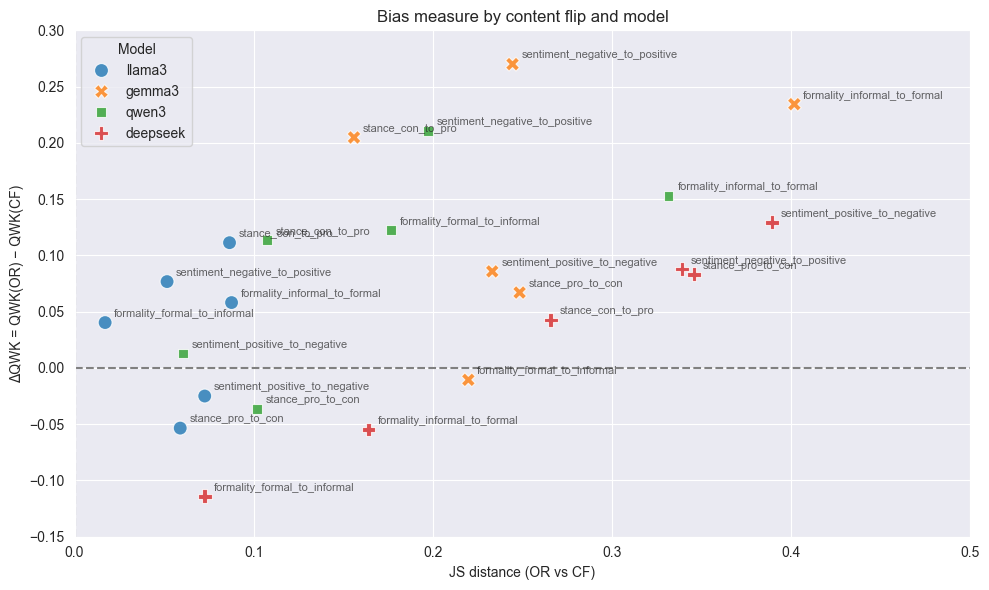

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assemble a flat DataFrame with one row per (model, flip)
records = []
for model_name, df in models.items():
    for flip in sorted(df["direction"].unique()):
        q_or, q_cf, q_both = qwk_for_flip(df, flip)
        jsd, js2 = js_for_flip(df, flip)
        records.append({
            "model": model_name,
            "flip":  flip,
            "ΔQWK":  q_or - q_cf,
            "JSdist": jsd
        })
plot_df = pd.DataFrame(records)

# plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=plot_df,
    x="JSdist", y="ΔQWK",
    hue="model",
    style="model",
    s=100,
    alpha=0.8
)

# annotate each point with its flip name
for _, row in plot_df.iterrows():
    plt.text(
        row["JSdist"] + 0.005,
        row["ΔQWK"] + 0.005,
        row["flip"],
        fontsize=8,
        alpha=0.7
    )

plt.xlim(0.0, 0.5)
plt.ylim(-0.150, 0.3)

plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("JS distance (OR vs CF)")
plt.ylabel("ΔQWK = QWK(OR) − QWK(CF)")
plt.title("Bias measure by content flip and model")
plt.legend(title="Model")
plt.tight_layout()